<a href="https://colab.research.google.com/github/AishaKanwal/LGMVIP-DataScience/blob/main/Task3-MusicRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore - VirtualInternshipProgram - LGMVIP | DataScienceInternship**
> **Task 3 - Music Recommendation**

> **Aisha Kanwal | Internee**

In [ ]:
# pip install missingno

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Load Data - Unzipping for this project

In [ ]:
# pip install pylzma

In [ ]:
# pip install py7zr

In [ ]:
# unzip the data
import py7zr

# with py7zr.SevenZipFile('train.csv.7z', mode='r') as z:
#     z.extractall()
# with py7zr.SevenZipFile('members.csv.7z', mode='r') as z:
#     z.extractall()
# with py7zr.SevenZipFile('sample_submission.csv.7z', mode='r') as z:
#     z.extractall()
# with py7zr.SevenZipFile('song_extra_info.csv.7z', mode='r') as z:
#     z.extractall()
# with py7zr.SevenZipFile('songs.csv.7z', mode='r') as z:
#     z.extractall()
# with py7zr.SevenZipFile('test.csv.7z', mode='r') as z:
#     z.extractall()

In [ ]:
members = pd.read_csv('members.csv')
sub = pd.read_csv('sample_submission.csv')
song_extra = pd.read_csv('song_extra_info.csv')
songs = pd.read_csv('songs.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

## Let's get insight of train dataset

## train.csv
> msno: user id <br>
> song_id : music id <br>
> source_system.tab: the name of the tab on which the event was triggered <br>
> source_screen_name: the name of the layout the user sees <br>
> source_type: The entry point where the user first plays music in the mobile app

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [ ]:
train['target'].value_counts()

1    3714656
0    3662762
Name: target, dtype: int64

## Let's get insight of test dataset

## test.csv
> msno: user id <br>
> song_id : music id <br>
> source_system.tab: the name of the tab on which the event was triggered <br>
> source_screen_name: the name of the layout the user sees <br>
> source_type: The entry point where the user first plays music in the mobile app

In [ ]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


## Let's get insights of songs.csv

## songs.csv 
> song_id : SongId <br>
> song_length : Length <br>
> genre_ids : genres (separated by '|' as some songs have multiple genres) <br>
> artist_name : Artist name <br>
> composer : Composer <br>
> lyricist : lyricist <br>
> language : language <br>

In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


## Let's get insights of members.csv

## members.csv (member information)
> msno: user id <br>
> city : the city you live in <br>
> bd : Age <br>
> gender : gender <br>
> registered_via : How to register <br>
> registration_init_time : Registration period <br>
> expiration_date : expiration date

In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


#### We have to set the registration_init_time and expiration_date in date format. 

In [ ]:
members = pd.read_csv('members.csv', parse_dates=['registration_init_time','expiration_date'])
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


### Here we go. registration_init_time and expiration_date is in date format. 

In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  object        
 1   city                    34403 non-null  int64         
 2   bd                      34403 non-null  int64         
 3   gender                  14501 non-null  object        
 4   registered_via          34403 non-null  int64         
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.8+ MB


## Let's get insights of songs_extra_info.csv

## song_extra_info.csv
> name : Song title <br>
> isrc: international standard recording code (can be used as the id of a song, but not officially verified)

In [ ]:
song_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
song_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


## Let's get insights of sample_submission.csv

In [ ]:
sub.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   target  float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB


# Exploratory Data Analysis

## Data Merge
> for smooth EDA process, lets merge the data

In [ ]:
#train
df = train

#test
df_test = test

In [ ]:
# songs.csv file [song_id] as left join
# train
df = pd.merge(df, songs, on='song_id', how='left')
# test
df_test = pd.merge(df_test, songs, on='song_id', how='left')


# members.csv file [msno] as left join
# train
df=pd.merge(df, members, on='msno', how='left')
# test
df_test=pd.merge(df_test, members, on='msno', how='left')


# song_extra_info.csv file [song_id] as left join
# train
df=pd.merge(df, song_extra, on='song_id', how='left')
# test
df_test=pd.merge(df_test, song_extra, on='song_id', how='left')

In [ ]:
## checking info for merged dataframes (train)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  city                    int64         
 13  bd                      int64         
 14  gender                  object        
 15  registered_via          int64         
 16  registration_init_time  datetime64[ns]
 17  expiration_date         datetime64[ns]
 18  na

In [ ]:
## checking info for merged dataframes (test)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      int64         
 1   msno                    object        
 2   song_id                 object        
 3   source_system_tab       object        
 4   source_screen_name      object        
 5   source_type             object        
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  city                    int64         
 13  bd                      int64         
 14  gender                  object        
 15  registered_via          int64         
 16  registration_init_time  datetime64[ns]
 17  expiration_date         datetime64[ns]
 18  na

### **Create derived features**
> **Generate date derivatives through membership registration and expiry date columns <br>**
> **Generate song registration date derivative feature through ISRC column**

In [ ]:
#train
# Add features by isolating registration date
df['registration_year'] = df['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
df['registration_month'] = df['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
df['registration_day'] = df['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

# Adding features by isolating expiration date
df['expiration_year'] = df['expiration_date'].apply(lambda x:int(str(x)[0:4]))
df['expiration_month'] = df['expiration_date'].apply(lambda x:int(str(x)[5:7]))
df['expiration_day'] = df['expiration_date'].apply(lambda x:int(str(x)[8:10]))

df=df.drop(['registration_init_time'], axis=1)
df=df.drop(['expiration_date'], axis=1)

#test
# Add features by isolating registration date
df_test['registration_year'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
df_test['registration_month'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
df_test['registration_day'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

# Adding features by isolating expiration date
df_test['expiration_year'] = df_test['expiration_date'].apply(lambda x:int(str(x)[0:4]))
df_test['expiration_month'] = df_test['expiration_date'].apply(lambda x:int(str(x)[5:7]))
df_test['expiration_day'] = df_test['expiration_date'].apply(lambda x:int(str(x)[8:10]))

df_test=df_test.drop(['registration_init_time'], axis=1)
df_test=df_test.drop(['expiration_date'], axis=1)

In [ ]:
# isrc: (2 digits) country code / (3 digits) registration company code / (2 digits) production year code / (5 digits) record code
df["isrc"].head(10)

0    GBUM71602854
1    US3C69910183
2    USUM70618761
3    GBUQH1000063
4    QM3E21606003
5    USUM71601094
6    TWA531400512
7    USLXJ1607334
8    USUM70759544
9    USUM71301306
Name: isrc, dtype: object

In [ ]:
# isrc (Extract the year from the song registration year feature)
def isrc_to_year(isrc):
    if type(isrc)==str:
        if int(isrc[5:7])>17:
            return 1900+int(isrc[5:7])
        else:
            return 2000+int(isrc[5:7])
    else:
        return np.nan
    
df['song_year']=df['isrc'].apply(isrc_to_year)
df_test['song_year']=df['isrc'].apply(isrc_to_year)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   msno                object 
 1   song_id             object 
 2   source_system_tab   object 
 3   source_screen_name  object 
 4   source_type         object 
 5   target              int64  
 6   song_length         float64
 7   genre_ids           object 
 8   artist_name         object 
 9   composer            object 
 10  lyricist            object 
 11  language            float64
 12  city                int64  
 13  bd                  int64  
 14  gender              object 
 15  registered_via      int64  
 16  name                object 
 17  isrc                object 
 18  registration_year   int64  
 19  registration_month  int64  
 20  registration_day    int64  
 21  expiration_year     int64  
 22  expiration_month    int64  
 23  expiration_day      int64  
 24  song_year           floa

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  int64  
 1   msno                object 
 2   song_id             object 
 3   source_system_tab   object 
 4   source_screen_name  object 
 5   source_type         object 
 6   song_length         float64
 7   genre_ids           object 
 8   artist_name         object 
 9   composer            object 
 10  lyricist            object 
 11  language            float64
 12  city                int64  
 13  bd                  int64  
 14  gender              object 
 15  registered_via      int64  
 16  name                object 
 17  isrc                object 
 18  registration_year   int64  
 19  registration_month  int64  
 20  registration_day    int64  
 21  expiration_year     int64  
 22  expiration_month    int64  
 23  expiration_day      int64  
 24  song_year           floa

<AxesSubplot:>

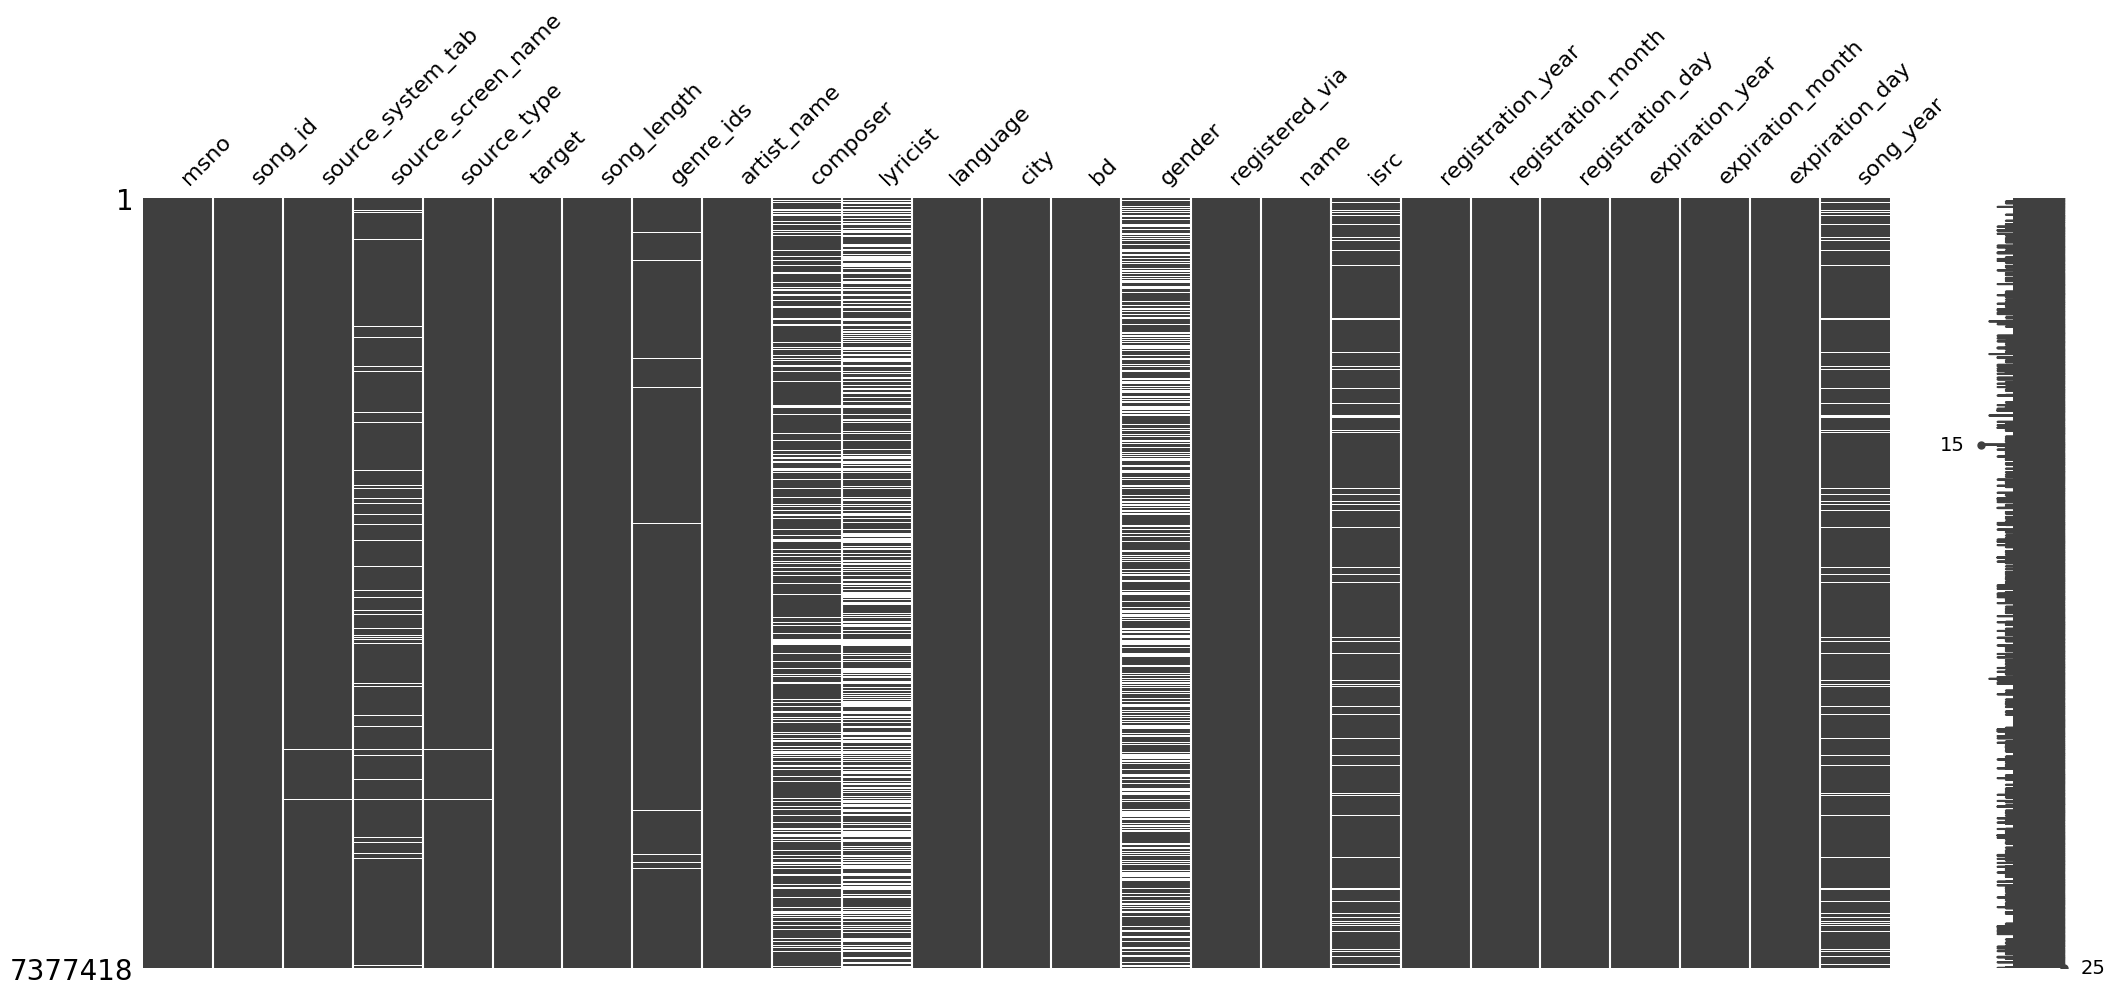

In [ ]:
msno.matrix(df)

<AxesSubplot:>

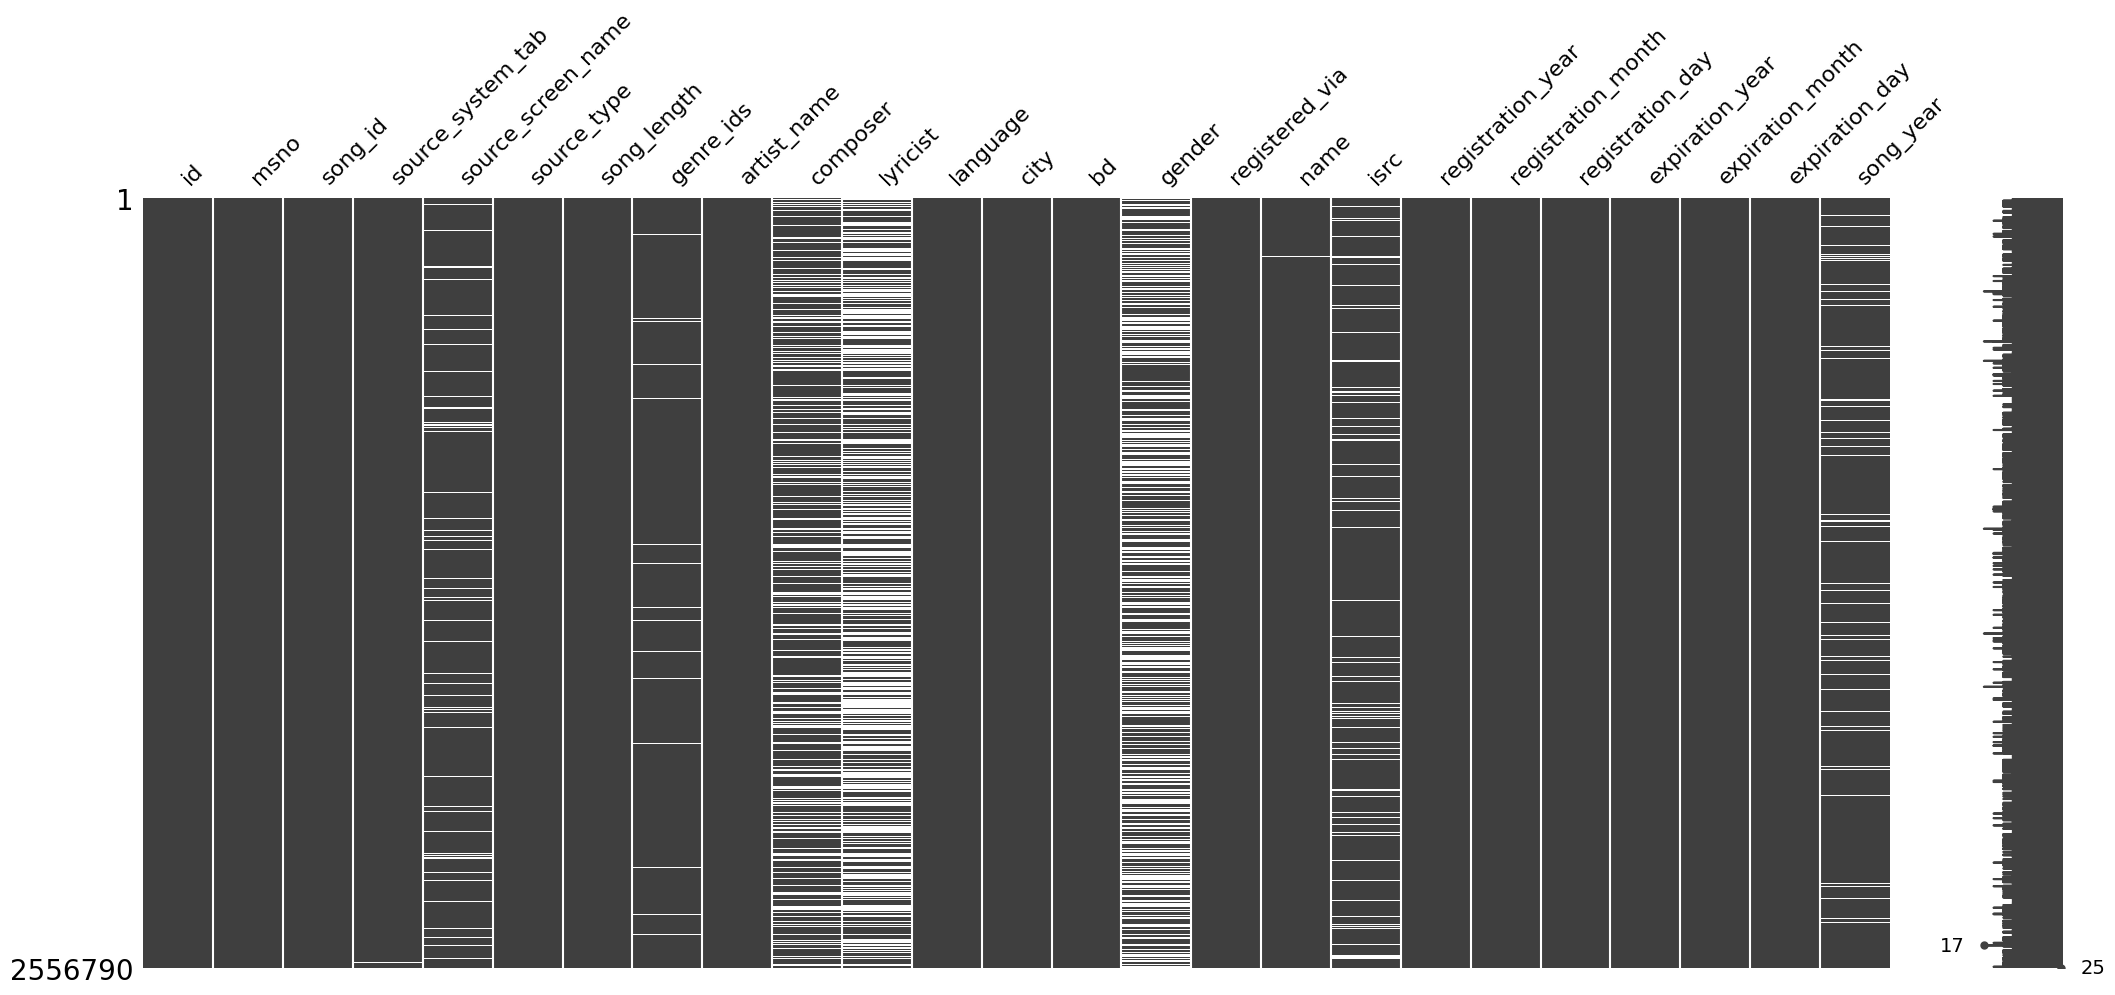

In [ ]:
msno.matrix(df_test)

In [ ]:
# train Check data types and missing values
ch1 = pd.DataFrame(df.dtypes, columns=["Data Type"])
ch1["Unique Values"] = df.nunique().sort_values()
ch1["Null Values"] = df.isnull().sum()
ch1["% null Values"] = df.isnull().sum()/len(df)
ch1 = ch1.sort_values(by="Null Values", ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)
ch1

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,33888,3178798,0.430882
gender,object,2,2961479,0.401425
composer,object,76064,1675706,0.227140
song_year,float64,100,577858,0.078328
isrc,object,269760,577858,0.078328
source_screen_name,object,20,414804,0.056226
genre_ids,object,572,118455,0.016056
source_system_tab,object,8,24849,0.003368
source_type,object,12,21539,0.002920
name,object,234144,1457,0.000197


* **Results from 'lyricist' to 'artist_name'

### **Feature Summary Table**

In [ ]:
# Create a feature summary table and look at each column
def resumetable(df) :
    print(f'dataset shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['datatypes'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'features'})
    summary['Number of missing values'] = df.isnull().sum().values
    summary['Number of eigenvalues'] = df.nunique().values
    summary['first value'] = df.loc[0].values
    summary['second value'] = df.loc[1].values
    summary['third value'] = df.loc[2].values
    
    return summary

resumetable(df)

dataset shape: (7377418, 25)


,features,datatypes,Number of missing values,Number of eigenvalues,first value,second value,third value
0,msno,object,0,30755,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=
1,song_id,object,0,359966,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=
2,source_system_tab,object,24849,8,explore,my library,my library
3,source_screen_name,object,414804,20,Explore,Local playlist more,Local playlist more
4,source_type,object,21539,12,online-playlist,local-playlist,local-playlist
5,target,int64,0,2,1,1,1
6,song_length,float64,114,60266,206471.0,284584.0,225396.0
7,genre_ids,object,118455,572,359,1259,1259
8,artist_name,object,114,40582,Bastille,Various Artists,Nas
9,composer,object,1675706,76064,Dan Smith| Mark Crew,NaN,N. Jones、W. Adams、J. Lordan、D. Ingle


**Binary features (gender)**
* **Encoding with 0s and 1s**

**nominal feature**
* object type : msno, song_id, source_system_tab, source_screen_name, source_type, genre_ids, artist_name, composer, lyricist, name, isrc
* 숫자형 : language, city, registered_via, registration_year, registration_month, registration_date, expiration_year, expiration_month, expiration_date, song_year
* **Visualize only columns with a small number of unique values (source_system_tab, source_screen_name, source_type, language, city, registered_via, registration_year, registration_month, registration_date, expiration_year, expiration_month, expiration_date)**

**numeric features (song_length, bd)**

### **Data Visualization**

Text(0.5, 1.0, 'Target Distribution')

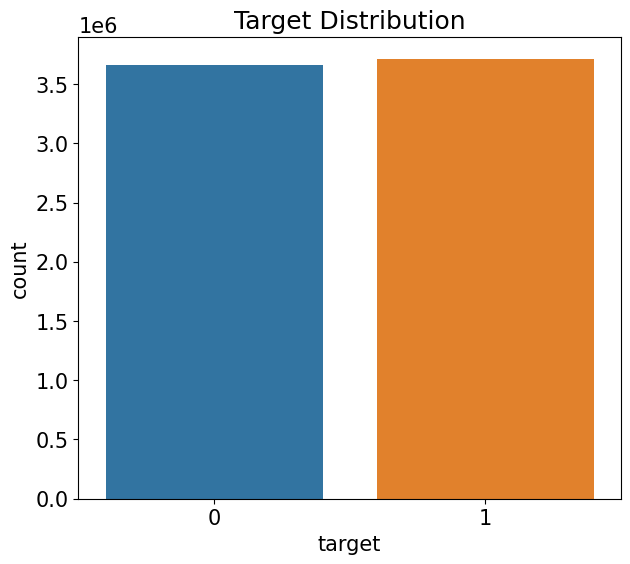

In [ ]:
# Checking the distribution of target values
mpl.rc('font', size=15) # set font size
plt.figure(figsize=(7, 6)) # Figure set size

# Target value distribution count plot
ax = sns.countplot(x='target', data=df)
ax.set_title('Target Distribution')

In [ ]:
# Display each value at the top of the percentage graph.
# Implement the code that displays the ratio as a function
def write_percent(ax, total_size):
    '''Tour the figure object and display the target value ratio at the top of the bar'''
    for patch in ax.patches:
        height = patch.get_height()      # Figure height (number of data)
        width = patch.get_width()        # shape width
        left_coord = patch.get_x()       # The x-axis position of the left border of the shape
        percent = height/total_size*100  # target value ratio
        
        # (x, y) Enter text at coordinates
        ax.text(x=left_coord + width/2.0,     # x-axis position
                y=height + total_size*0.001,  # y-axis position
                s=f'{percent:1.1f}%',         # input text
                ha='center')                  # center aligned

In [ ]:
import matplotlib.gridspec as gridspec # Arrange multiple graphs in grid form

# Crosstabulation function
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [ ]:
# Step2. Pointplot Generation Function
# Use the crosstabulation table obtained in Step 1. 
# Create a function that draws a point plot representing the percentage of a target value of 1 (duplicate the point plot on top of the count plot)
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()  # Create a new axis that shares the x-axis and does not share the y-axis
    
    # Draw Point Plot on New Axis
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values,   # point plot order
                        color='black',                    # point plot color
                        legend=False)                     # no legend
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)  # Set y-axis range
    ax2.set_ylabel('Target 1 Ratio(%)')

In [ ]:
# Step3. Function to create feature distribution plot and target value 1 ratio pointplot for each feature
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols,
                                  size=(30, 40)):
    plt.figure(figsize=size)  # Set overall figure size
    grid = gridspec.GridSpec(num_rows, num_cols)  # subplot placement
    plt.subplots_adjust(wspace=0.45, hspace=0.6)  # Set subplot left and right/top and bottom margins
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)  # Create a crosstabulation table
        
        # Draw target value distribution count plot on ax-axis
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)
        
        write_percent(ax, len(df))  # percentage display
        
        plot_pointplot(ax, feature, crosstab)  # Draw point plot
        
        ax.set_title(f'{feature} Distribution')  # Set graph title

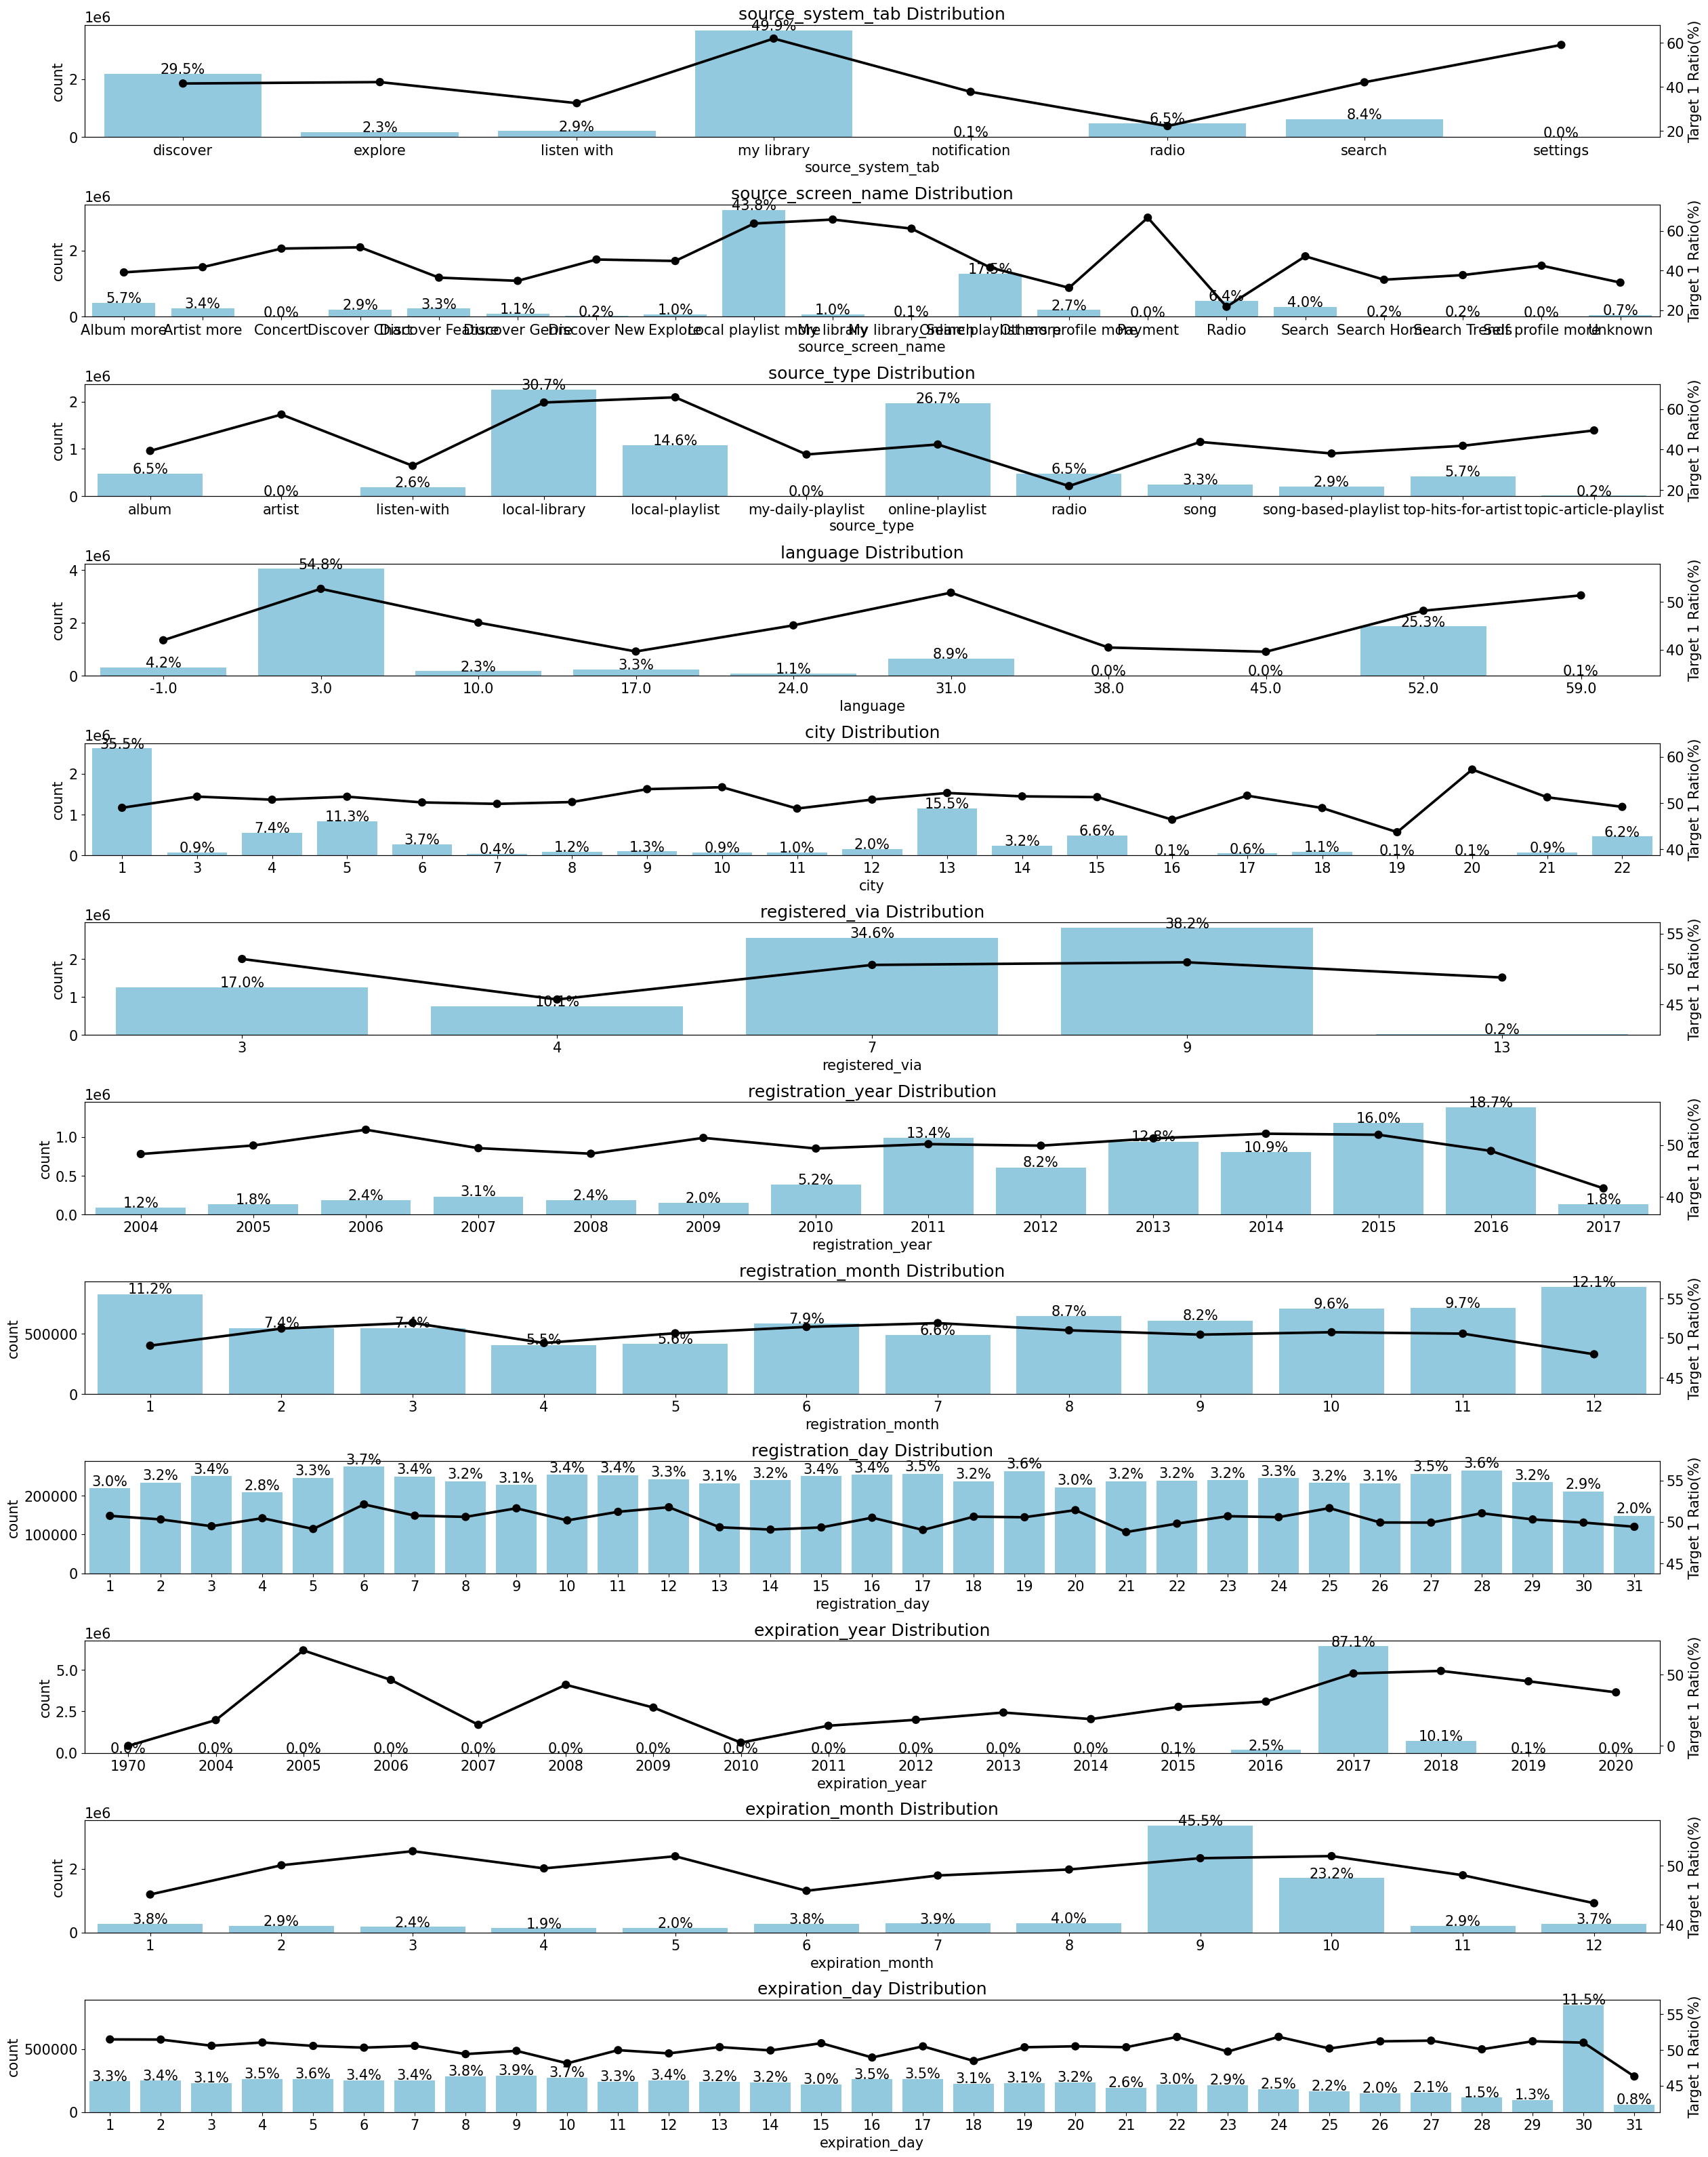

In [ ]:
# Visualize nominal feature distribution
nom_features = ['source_system_tab', 'source_screen_name', 'source_type', 'language', 'city', 'registered_via', 'registration_year', 'registration_month', 'registration_day', 'expiration_year', 'expiration_month', 'expiration_day']  # nominal feature
plot_cat_dist_with_true_ratio(df, nom_features, num_rows=12, num_cols=1)

* Count Plot: Percentage of eigenvalues ​​per feature.
* Point Plot: The ratio of the eigenvalues ​​to which the target value is 1.
* **Nominal Features -> One-Hot Encoding**

* **Apply one-hot encoding to the rest of the features**

# Feature Engineering

### **Handling missing values**

In [ ]:
df['song_length'].fillna(df['song_length'].mean() , inplace = True)
df['song_length'] = df['song_length'].astype(np.uint32)
df['language'].fillna(df['language'].mode().values[0] , inplace= True)
df['language'] = df['language'].astype(np.int8)
df['song_year'].fillna(1917, inplace = True)
df['song_year'] = df['song_year'].astype(np.int8)

df_test['song_length'].fillna(df_test['song_length'].mean() , inplace = True)
df_test['song_length'] = df_test['song_length'].astype(np.uint32)
df_test['language'].fillna(df_test['language'].mode().values[0] , inplace= True)
df_test['language'] = df_test['language'].astype(np.int8)
df_test['song_year'].fillna(1917, inplace = True)
df_test['song_year'] = df_test['song_year'].astype(np.int8)

## Fill missing values ​​- df | train data

In [ ]:
# String Null case, 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
    
# Numerics Null case, mean    
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

## Fill missing values ​​- df_test | test data

In [ ]:
# String Null 일 경우, 'Unknown'
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].fillna(value = "unknown")
    
# Numerics Null 일 경우, mean    
for col in df_test.select_dtypes(exclude=['object']).columns:
    df_test[col] = df_test[col].fillna(value = df_test[col].mean())

### **Handling outliers (bd)**

In [ ]:
df['bd'].unique()

array([   0,   24,   26,   27,   18,   34,   20,   19,   28,   41,   32,
         36,   46,   30,   23,   67,   22,   29,   21,   31,   39,   35,
         16,   25,   38,   17,   43,   47,   33,   37,   44,   49,   50,
         40,   52,   45,   53,   64,   57,   48,   51,   59,   54,   42,
         55,    3,  111,   65,   73,   60,   58,   56,   66,   14,  131,
         74,   62,   61,   63,    7,  103, 1030,  -43,   15,  105,  107,
         68,   13,  931,   72,   11,    2,   87,  144,   95,   83,   12,
         93,    5,  112,   90,   10,   70,  -38,   82,   89,  106,  102,
         85, 1051,   78,   76], dtype=int64)

In [ ]:
df['bd'] = df['bd'].apply(lambda x : 0 if x > 100 else abs(x))
df_test['bd'] = df_test['bd'].apply(lambda x : 0 if x > 100 else abs(x))

### **Remove unnecessary features**

In [ ]:
drop = ['isrc', 'name']

In [ ]:
df.drop(columns = drop , inplace = True)
df_test.drop(columns=drop , inplace = True)

### **Data Encoding**

* **All features: apply label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])
    
for i in df_test.columns:
    df_test[i] = label_encoder.fit_transform(df_test[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 23 columns):
 #   Column              Dtype
---  ------              -----
 0   msno                int32
 1   song_id             int32
 2   source_system_tab   int32
 3   source_screen_name  int32
 4   source_type         int32
 5   target              int64
 6   song_length         int64
 7   genre_ids           int32
 8   artist_name         int32
 9   composer            int32
 10  lyricist            int32
 11  language            int64
 12  city                int64
 13  bd                  int64
 14  gender              int32
 15  registered_via      int64
 16  registration_year   int64
 17  registration_month  int64
 18  registration_day    int64
 19  expiration_year     int64
 20  expiration_month    int64
 21  expiration_day      int64
 22  song_year           int64
dtypes: int32(10), int64(13)
memory usage: 1.3 GB


In [ ]:
df.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,bd,gender,registered_via,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day,song_year
0,8158,74679,1,7,6,1,19020,285,3277,14581,...,0,2,2,8,0,1,14,9,4,96
1,17259,223479,3,8,4,1,36985,90,31960,64996,...,19,0,3,7,4,24,14,8,10,79
2,17259,120758,3,8,4,1,23675,90,21372,45057,...,19,0,3,7,4,24,14,8,10,86
3,17259,23707,3,8,4,1,30970,6,27439,36700,...,19,0,3,7,4,24,14,8,10,90
4,8158,33308,1,7,6,1,14877,2,4472,8485,...,0,2,2,8,0,1,14,9,4,96
5,8158,30191,1,7,6,1,29194,90,8146,55579,...,0,2,2,8,0,1,14,9,4,96
6,17259,190019,3,8,4,1,24869,344,2902,57875,...,19,0,3,7,4,24,14,8,10,94
7,8158,221827,1,7,6,1,13553,2,30636,59127,...,0,2,2,8,0,1,14,9,4,96
8,28058,9180,3,8,3,1,35965,185,22377,52683,...,21,1,3,7,10,6,15,2,3,87
9,28058,93827,3,8,3,1,31384,344,22377,52683,...,21,1,3,7,10,6,15,2,3,93


# Baseline Model(LGBM)

### **Data split**

In [ ]:
# X, y separation
X = df.drop('target', axis=1)
y = df[['target']]


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 22 columns):
 #   Column              Dtype
---  ------              -----
 0   msno                int32
 1   song_id             int32
 2   source_system_tab   int32
 3   source_screen_name  int32
 4   source_type         int32
 5   song_length         int64
 6   genre_ids           int32
 7   artist_name         int32
 8   composer            int32
 9   lyricist            int32
 10  language            int64
 11  city                int64
 12  bd                  int64
 13  gender              int32
 14  registered_via      int64
 15  registration_year   int64
 16  registration_month  int64
 17  registration_day    int64
 18  expiration_year     int64
 19  expiration_month    int64
 20  expiration_day      int64
 21  song_year           int64
dtypes: int32(10), int64(12)
memory usage: 1.2 GB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   target  int64
dtypes: int64(1)
memory usage: 370.6 MB


In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5901934, 22), (1475484, 22), (5901934, 1), (1475484, 1))

In [ ]:
# baseline02
# pip install lightgbm

In [ ]:
import lightgbm as lgb

train_ds = lgb.Dataset(X_train, label = y_train)
val_ds = lgb.Dataset(X_valid, label = y_valid)

df_test = df_test.drop('id',axis=1)

In [ ]:
params = {
    'application' : 'binary',
    'objective' : 'binary',
    'metric' : 'auc',
    'is_unbalance' : 'true',
    'boosting' : 'gbdt',
    'num_leaves' : 216,
    'feature_fraction' : 0.9,
    'feature_fraction_seed' : 1,
    'bagging_fraction' : 0.95,
    'bagging_freq' : 1,
    'bagging_seed' : 1,
    'learning_rate' : 0.3,
    'verbose' : 0,
    'max_bin' : 510,
    'max_depth': 20,
    'num_rounds': 500,
}

lgb_model = lgb.train(params, train_ds, valid_sets = val_ds, verbose_eval=5)
lgb_pred = lgb_model.predict(X_valid)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.171670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[5]	valid_0's auc: 0.690221
[10]	valid_0's auc: 0.702979
[15]	valid_0's auc: 0.712748
[20]	valid_0's auc: 0.720155
[25]	valid_0's auc: 0.724743
[30]	valid_0's auc: 0.730038
[35]	valid_0's auc: 0.733012
[40]	valid_0's auc: 0.736778
[45]	valid_0's auc: 0.740253
[50]	valid_0's auc: 0.743263
[55]	valid_0's auc: 0.745729
[60]	valid_0's auc: 0.748556
[65]	valid_0's auc: 0.751786
[70]	valid_0's auc: 0.753929
[75]	valid_0's auc: 0.756063
[80]	valid_0's auc: 0.757455
[85]	valid_0's auc: 0.759309
[

In [ ]:
y_pred = lgb_model.predict(df_test)

In [ ]:
sub['target'] = y_pred
sub.head()

,id,target
0,0,0.458376
1,1,0.220062
2,2,0.033869
3,3,0.017055
4,4,0.030346


In [ ]:
sub.to_csv('sub.csv', index=False)

# Performance improvement model #1

### **Data preparation**

In [ ]:
# train
df = train

# test
df_test = test

# songs.csv file [song_id] as left join
# train
df = pd.merge(df, songs, on='song_id', how='left')
# test
df_test = pd.merge(df_test, songs, on='song_id', how='left')

# members.csv file [msno] as left join
# train
df=pd.merge(df, members, on='msno', how='left')
# test
df_test=pd.merge(df_test, members, on='msno', how='left')

# song_extra_info.csv file [song_id] as left join
# train
df=pd.merge(df, song_extra, on='song_id', how='left')
# test
df_test=pd.merge(df_test, song_extra, on='song_id', how='left')

### **Create additional derived features**
> **Create year derived features and membership period derived features through membership registration and expiration date columns <br>**

In [ ]:
# train
# Add features by isolating registration date (registration_year,month,day)
df['registration_year'] = df['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
df['registration_month'] = df['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
df['registration_day'] = df['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

# Adding features by isolating expiration date (expiration_year,month,day)
df['expiration_year'] = df['expiration_date'].apply(lambda x:int(str(x)[0:4]))
df['expiration_month'] = df['expiration_date'].apply(lambda x:int(str(x)[5:7]))
df['expiration_day'] = df['expiration_date'].apply(lambda x:int(str(x)[8:10]))

# Membership period feature added (membership_days)
df['membership_days'] = df['expiration_date'].subtract(df['registration_init_time']).dt.days.astype(int)

df=df.drop(['registration_init_time'], axis=1)
df=df.drop(['expiration_date'], axis=1)

# test
# Add features by isolating registration date (registration_year,month,day)
df_test['registration_year'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
df_test['registration_month'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
df_test['registration_day'] = df_test['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

# Adding features by isolating expiration date (expiration_year,month,day)
df_test['expiration_year'] = df_test['expiration_date'].apply(lambda x:int(str(x)[0:4]))
df_test['expiration_month'] = df_test['expiration_date'].apply(lambda x:int(str(x)[5:7]))
df_test['expiration_day'] = df_test['expiration_date'].apply(lambda x:int(str(x)[8:10]))

# Membership period feature added (membership_days)
df_test['membership_days'] = df_test['expiration_date'].subtract(df_test['registration_init_time']).dt.days.astype(int)

df_test=df_test.drop(['registration_init_time'], axis=1)
df_test=df_test.drop(['expiration_date'], axis=1)

In [ ]:
# Extract year from isrc to create song registration year feature (song_year)
def isrc_to_year(isrc):
    if type(isrc)==str:
        if int(isrc[5:7])>17:
            return 1900+int(isrc[5:7])
        else:
            return 2000+int(isrc[5:7])
    else:
        return np.nan
    
    
df['song_year']=df['isrc'].apply(isrc_to_year)
df_test['song_year']=df['isrc'].apply(isrc_to_year)

In [ ]:
# Number of genres for that song Create feature (genre_count)
def genre_count(genre):
    if genre == 'no_genre_ids':
        return 0
    else :
        return genre.count('|') + 1

df['genre_ids'].fillna('no_genre_ids' , inplace= True)
df['genre_ids_count'] = df['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)
df_test['genre_ids'].fillna('no_genre_ids' , inplace= True)
df_test['genre_ids_count'] = df_test['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)

In [ ]:
df['artist_name'].fillna('no_artist', inplace = True)
df_test['artist_name'].fillna('no_artist', inplace = True)

In [ ]:
# Create a column whether the song is featured or not (is_featured)
def is_featured(art) :
    if 'feat' in str(art) :
        return 1
    return 0

df['is_featured'] = df['artist_name'].apply(is_featured).astype(np.int8)
df_test['is_featured'] = df_test['artist_name'].apply(is_featured).astype(np.int8)

# Create a feature for the number of artists in that song (artist_count)
def artist_count(x):
    if x == 'no_artist':
        return 0
    else:
        return x.count('and') + x.count(',') + x.count('feat') + x.count('&')+ x.count('|')+ x.count('/') + x.count('//') + x.count(';')+ 1

df['artist_count'] = df['artist_name'].apply(artist_count).astype(np.int8)
df_test['artist_count'] = df_test['artist_name'].apply(artist_count).astype(np.int8)

In [ ]:
# Number of composers for that song Feature creation (composer_count)
def composer_count(x):
    if x == 'no_composer':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

df['composer'].fillna('no_composer',inplace=True)
df['composer_count'] = df['composer'].apply(composer_count).astype(np.int8)
df_test['composer'].fillna('no_composer',inplace=True)
df_test['composer_count'] = df_test['composer'].apply(composer_count).astype(np.int8)


# Create a feature for the number of lyricists for that song (lyricist_count)
def lyricist_count(x):
    if x == 'no_lyricist':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

df['lyricist'].fillna('no_lyricist',inplace=True)
df['lyricists_count'] = df['lyricist'].apply(lyricist_count).astype(np.int8)
df_test['lyricist'].fillna('no_lyricist',inplace=True)
df_test['lyricists_count'] = df_test['lyricist'].apply(lyricist_count).astype(np.int8)

In [ ]:
# If the song's artist is the composer (artist_composer)
df['artist_composer'] = (df['artist_name'] == df['composer']).astype(np.int8)
df_test['artist_composer'] = (df_test['artist_name'] == df_test['composer']).astype(np.int8)

# If the artist of the song is both a composer and a lyricist (singer-songwriter) (artist_composer_lyricist)
df['artist_composer_lyricist'] = ((df['artist_name'] == df['composer']) & 
                                  (df['artist_name'] == df['lyricist']) & 
                                  (df['composer'] == df['lyricist'])).astype(np.int8)
df_test['artist_composer_lyricist'] = ((df_test['artist_name'] == df_test['composer']) & 
                                       (df_test['artist_name'] == df_test['lyricist']) & 
                                       (df_test['composer'] == df_test['lyricist'])).astype(np.int8)

In [ ]:
# Whether the song is longer than average or not
_mean_song_length = np.mean(df['song_length'])
def smaller_song(x):
    if x < _mean_song_length:
        return 1
    return 0

df['smaller_song'] = df['song_length'].apply(smaller_song).astype(np.int8)
df_test['smaller_song'] = df_test['song_length'].apply(smaller_song).astype(np.int8)

In [ ]:
# Generate a feature of how many times the song has been played in the dataset (play_count_song)
dict_count_song_played_train = {k: v for k, v in df['song_id'].value_counts().iteritems()}
dict_count_song_played_test = {k: v for k, v in df_test['song_id'].value_counts().iteritems()}
def return_number_played(x):
    try:
        return dict_count_song_played_train[x]
    except KeyError:
        try:
            return dict_count_song_played_test[x]
        except KeyError:
            return 0
df['play_count_song'] = df['song_id'].apply(lambda x: return_number_played(x))
df_test['play_count_song'] = df_test['song_id'].apply(lambda x: return_number_played(x))

In [ ]:
# Generate a feature of how much the user played in the dataset (play_count_msno)
dict_user_activity = {k:v for k,v in pd.concat([df['msno'] , df_test['msno']] , axis = 0).value_counts().iteritems()}

def return_user_activity(x):
    try:
        return dict_user_activity[x]
    except KeyError:
        return 0
    
df['play_count_msno'] = df['msno'].apply(lambda x: return_user_activity(x))
df_test['play_count_msno'] = df_test['msno'].apply(lambda x: return_user_activity(x))

In [ ]:
# Generate a feature of how many times the song's artist has been played in the dataset (play_count_artist)
_dict_count_artist_played_train = {k: v for k, v in df['artist_name'].value_counts().iteritems()}
_dict_count_artist_played_test = {k: v for k, v in df_test['artist_name'].value_counts().iteritems()}

def count_artist_played(x):
    try:
        return _dict_count_artist_played_train[x]
    except KeyError:
        try:
            return _dict_count_artist_played_test[x]
        except KeyError:
            return 0

df['play_count_artist'] = df['artist_name'].apply(count_artist_played).astype(np.int64)
df_test['play_count_artist'] = df_test['artist_name'].apply(count_artist_played).astype(np.int64)

In [ ]:
# Handling missing values
df['song_length'].fillna(df['song_length'].mean() , inplace = True)
df['song_length'] = df['song_length'].astype(np.uint32)
df['language'].fillna(df['language'].mode().values[0] , inplace= True)
df['language'] = df['language'].astype(np.int8)
df['song_year'].fillna(1917, inplace = True)
df['song_year'] = df['song_year'].astype(np.int8)

df_test['song_length'].fillna(df_test['song_length'].mean() , inplace = True)
df_test['song_length'] = df_test['song_length'].astype(np.uint32)
df_test['language'].fillna(df_test['language'].mode().values[0] , inplace= True)
df_test['language'] = df_test['language'].astype(np.int8)
df_test['song_year'].fillna(1917, inplace = True)
df_test['song_year'] = df_test['song_year'].astype(np.int8)



# Fill missing values ​​- df

# In case of String Null, 'unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
    
# Numerics In case of Null, mean  
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())
    
    
# Fill missing values ​​- df_test

# In case of String Null, 'Unknown'
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].fillna(value = "unknown")
    
# In case of Numerics Null, mean    
for col in df_test.select_dtypes(exclude=['object']).columns:
    df_test[col] = df_test[col].fillna(value = df_test[col].mean())

In [ ]:
# outlier handling
df['bd'] = df['bd'].apply(lambda x : 0 if x > 100 else abs(x))
df_test['bd'] = df_test['bd'].apply(lambda x : 0 if x > 100 else abs(x))

In [ ]:
# Remove unnecessary columns
drop = ['isrc', 'name']

In [ ]:
df.drop(columns = drop , inplace = True)
df_test.drop(columns=drop , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 35 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   msno                      object
 1   song_id                   object
 2   source_system_tab         object
 3   source_screen_name        object
 4   source_type               object
 5   target                    int64 
 6   song_length               uint32
 7   genre_ids                 object
 8   artist_name               object
 9   composer                  object
 10  lyricist                  object
 11  language                  int8  
 12  city                      int64 
 13  bd                        int64 
 14  gender                    object
 15  registered_via            int64 
 16  registration_year         int64 
 17  registration_month        int64 
 18  registration_day          int64 
 19  expiration_year           int64 
 20  expiration_month          int64 
 21  expirati

### **data encoding**

### Binary Feature Encoding 

In [ ]:
# binary feature encoding ('gender' encoding)
df['gender'] = df['gender'].map({'unknown':0,'female':1, 'male':2})
df_test['gender'] = df_test['gender'].map({'unknown':0,'female':1, 'male':2})

### Label Encoding

In [ ]:
# Label encoding (categorical data)
from sklearn.preprocessing import LabelEncoder

label_encoding = ['source_system_tab', 'source_screen_name', 'source_type']

for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(df[f].values) + list(df_test[f].values))
    df[f] = lb.transform(list(df[f].values))
    df_test[f] = lb.transform(list(df_test[f].values))

### Nominal Feature Engineering

In [ ]:
# # Nominal feature encoding
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
    
# Data encoding progress - df_test
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes

### **Data Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaling = ['song_length','membership_days',
                   'play_count_song', 'play_count_msno', 'play_count_artist']

for f in min_max_scaling :
    ms = MinMaxScaler()
    df[f] = ms.fit_transform(df[[f]])
    df_test[f] = ms.transform(df_test[[f]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 35 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   msno                      int16  
 1   song_id                   int32  
 2   source_system_tab         int32  
 3   source_screen_name        int32  
 4   source_type               int32  
 5   target                    int64  
 6   song_length               float64
 7   genre_ids                 int16  
 8   artist_name               int32  
 9   composer                  int32  
 10  lyricist                  int32  
 11  language                  int8   
 12  city                      int64  
 13  bd                        int64  
 14  gender                    int64  
 15  registered_via            int64  
 16  registration_year         int64  
 17  registration_month        int64  
 18  registration_day          int64  
 19  expiration_year           int64  
 20  expiration_month        

### **Model training and performance prediction**

In [ ]:
#X,y separation
X = df.drop('target', axis = 1)
y = df['target']
ids = df_test['id'].values

# train_test_split 
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

train_ds = lgb.Dataset(X_train, label = y_train)
val_ds = lgb.Dataset(X_valid, label = y_valid)

X_test = df_test.drop('id',axis=1)

In [ ]:
# Score high parameter #1
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'dart',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 200,
        'metric' : 'auc'
    }


lgb_model_1 = lgb.train(params, train_ds, valid_sets = val_ds, verbose_eval=5)

lgb_pred_1 = lgb_model_1.predict(X_test)
sub['target']= lgb_pred_1

sub.to_csv('sub_lgbm_1.csv', index=False, float_format = "%.5f")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 4.007870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[5]	valid_0's auc: 0.705681
[10]	valid_0's auc: 0.710386
[15]	valid_0's auc: 0.713889
[20]	valid_0's auc: 0.718436
[25]	valid_0's auc: 0.720784
[30]	valid_0's auc: 0.724532
[35]	valid_0's auc: 0.726053
[40]	valid_0's auc: 0.728835
[45]	valid_0's auc: 0.729965
[50]	valid_0's auc: 0.72985
[55]	valid_0's auc: 0.731355
[60]	valid_0's auc: 0.732039
[65]	valid_0's auc: 0.732206
[70]	valid_0's auc: 0.7325
[75]	valid_0's auc: 0.733488
[80]	valid_0's auc: 0.734745
[85]	valid_0's auc: 0.734679
[90]	valid_0's auc: 0.734758
[95]	valid_0's auc: 0.7347
[100]	valid_0's auc: 0.73528
[105]	valid_0's auc: 0.735681
[110]	valid_0's auc: 0.735339
[115]	valid_0's auc: 0.736394
[120]	valid_0's auc: 0.737359
[125]	valid_0's auc: 0.737633
[130]	valid_0's auc: 0.738079
[135]	valid_0's auc: 0.739292
[140]	valid_0's auc: 0.739718
[145]	valid_0's auc: 

In [ ]:
# Score High Parameter #2
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 200,
        'metric' : 'auc'
}


lgb_model_2 = lgb.train(params, train_ds, valid_sets = val_ds, verbose_eval=5)

lgb_pred_2 = lgb_model_2.predict(X_test)
sub['target']= lgb_pred_2
sub.to_csv('sub_lgbm_2.csv' , index = False , float_format ='%.5f')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.193143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[5]	valid_0's auc: 0.705681
[10]	valid_0's auc: 0.711778
[15]	valid_0's auc: 0.716913
[20]	valid_0's auc: 0.720356
[25]	valid_0's auc: 0.724159
[30]	valid_0's auc: 0.727119
[35]	valid_0's auc: 0.730137
[40]	valid_0's auc: 0.733159
[45]	valid_0's auc: 0.736451
[50]	valid_0's auc: 0.738512
[55]	valid_0's auc: 0.740676
[60]	valid_0's auc: 0.742775
[65]	valid_0's auc: 0.744282
[70]	valid_0's auc: 0.745989
[75]	valid_0's auc: 0.747839
[80]	valid_0's auc: 0.749353
[85]	valid_0's auc: 0.750312
[90]	valid_0's auc: 0.751782
[95]	valid_0's auc: 0.752682
[100]	valid_0's auc: 0.753317
[105]	valid_0's auc: 0.754473
[110]	valid_0's auc: 0.755372
[115]	valid_0's auc: 0.75703
[120]	valid_0's auc: 0.758236
[125]	valid_0's auc: 0.75871
[130]	valid_0's auc: 0.759738
[135]	valid_0's auc: 0.760621
[140]	valid_0's auc: 0.761646
[145]	valid_0's a

# Performance improvement model #2

### **Ensemble**

In [ ]:
# LGBM Ensemble
lgb_asb = np.mean([lgb_pred_1, lgb_pred_2], axis = 0)

In [ ]:
sub = pd.DataFrame()
sub['id'] = ids
sub['target'] = lgb_asb
sub.to_csv('submission_lgbm_asb.csv', index=False, float_format = '%.5f')

### Using the XGBoost model


In [ ]:
# pip install xgboost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=10, 
                              min_child_weight=5, n_estimators=50)
xgb_model.fit(X, y)

In [ ]:
xgb_pred = xgb_model.predict_proba(X_test)[:, 1] 
sub['id'] = ids
sub['target'] = xgb_pred
sub.to_csv('sub_xgboost.csv', index=False, float_format = '%.5f')

In [ ]:
# XGB & LGBM Ensemble
xgb_lgb_asb = np.mean([lgb_pred_2, xgb_pred], axis = 0)

sub = pd.DataFrame()
sub['id'] = ids
sub['target'] = xgb_lgb_asb
sub.to_csv('submission_xgb_lgbm_asb.csv', index=False, float_format = '%.5f')

# Task 3 - Music Recommendation
**Done by Aisha Kanwal**